<a href="https://colab.research.google.com/github/Bhushan4-tech/new_project/blob/main/Reach_Mobile_Clustering_Avg_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries used

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
os.listdir()

['.ipynb_checkpoints',
 'Avg_swarmplot.jpg',
 'Mobile Data Cost - Shortcut.lnk',
 'Mobile Data Cost.csv',
 'Mobile Data Cost.xlsx',
 'Reach_Mobile_Clustering-Avg_Price.ipynb',
 'Reach_Mobile_Clustering.ipynb']

In [ ]:
# Reading the Dataset
df = pd.read_excel(r'Mobile Data Cost.xlsx')
df

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 12/07/2022)),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date,Unnamed: 14,Global Totals (2022),Unnamed: 16
0,1,IL,Israel,NEAR EAST,20,0.146489,ILS,0.286517,0.041993,0.059900,0.017171,0.590000,0.169131,2022-04-25,NaN,Total number of countries,233.000000
1,2,IT,Italy,WESTERN EUROPE,28,0.119850,EUR,1.000205,0.119992,0.046633,0.046689,2.000000,2.002370,2022-04-26,NaN,Most expensive 1GB,41.061940
2,3,SM,San Marino,WESTERN EUROPE,2,0.139500,EUR,1.000205,0.139665,0.079000,0.079094,0.200000,0.200237,2022-05-12,NaN,Cheapest 1GB,0.041993
3,4,FJ,Fiji,OCEANIA,17,0.333333,FJD,0.447802,0.149301,0.166667,0.074650,1.750000,0.783829,2022-04-19,NaN,Average package price globally,3.120159
4,5,IN,India,ASIA (EX. NEAR EAST),36,13.200000,INR,0.012575,0.165797,3.775000,0.047415,645.000000,8.101439,2022-04-25,NaN,Total packages included in study,5292.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,229,YE,Yemen,NEAR EAST,20,4150.000000,YER,0.003996,16.583433,1000.000000,3.996008,11000.000000,43.956088,2022-05-20,NaN,NaN,NaN
229,230,TK,Tokelau,OCEANIA,6,29.273504,NZD,0.610355,17.876890,22.222222,13.570778,40.000000,24.427400,2022-05-16,NaN,NaN,NaN
230,231,ST,São Tomé and Príncipe,SUB-SAHARAN AFRICA,13,66.666667,STN,0.041930,29.491333,30.000000,13.271100,366.666667,162.202333,2022-05-12,NaN,NaN,NaN
231,232,FK,Falkland Islands,SOUTH AMERICA,4,32.500000,FKP,1.182510,38.451563,21.666667,25.634375,60.000000,70.987500,2022-04-19,NaN,NaN,NaN


In [ ]:
# Dropping irrelevant columns
df.drop(['Country code','Average price of 1GB (local currency)','Currency','Most expensive 1GB (Local currency)'],axis=1, inplace= True)

In [ ]:
df

,Rank,Name,Continental region,Plans measured,Conversion rate (USD) (Frozen 12/07/2022)),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB (USD),Most expensive 1GB (USD),Sample date,Unnamed: 14,Global Totals (2022),Unnamed: 16
0,1,Israel,NEAR EAST,20,0.286517,0.041993,0.059900,0.017171,0.169131,2022-04-25,NaN,Total number of countries,233.000000
1,2,Italy,WESTERN EUROPE,28,1.000205,0.119992,0.046633,0.046689,2.002370,2022-04-26,NaN,Most expensive 1GB,41.061940
2,3,San Marino,WESTERN EUROPE,2,1.000205,0.139665,0.079000,0.079094,0.200237,2022-05-12,NaN,Cheapest 1GB,0.041993
3,4,Fiji,OCEANIA,17,0.447802,0.149301,0.166667,0.074650,0.783829,2022-04-19,NaN,Average package price globally,3.120159
4,5,India,ASIA (EX. NEAR EAST),36,0.012575,0.165797,3.775000,0.047415,8.101439,2022-04-25,NaN,Total packages included in study,5292.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,229,Yemen,NEAR EAST,20,0.003996,16.583433,1000.000000,3.996008,43.956088,2022-05-20,NaN,NaN,NaN
229,230,Tokelau,OCEANIA,6,0.610355,17.876890,22.222222,13.570778,24.427400,2022-05-16,NaN,NaN,NaN
230,231,São Tomé and Príncipe,SUB-SAHARAN AFRICA,13,0.041930,29.491333,30.000000,13.271100,162.202333,2022-05-12,NaN,NaN,NaN
231,232,Falkland Islands,SOUTH AMERICA,4,1.182510,38.451563,21.666667,25.634375,70.987500,2022-04-19,NaN,NaN,NaN


In [ ]:
df.drop(['Conversion rate (USD) (Frozen 12/07/2022))','Cheapest 1GB (Local currency)'],axis=1,inplace=True)

In [ ]:
df.drop(['Sample date','Unnamed: 14','Global Totals (2022)','Unnamed: 16'],axis=1,inplace=True)

In [ ]:
df

,Rank,Name,Continental region,Plans measured,Average price of 1GB (USD),Cheapest 1GB (USD),Most expensive 1GB (USD)
0,1,Israel,NEAR EAST,20,0.041993,0.017171,0.169131
1,2,Italy,WESTERN EUROPE,28,0.119992,0.046689,2.002370
2,3,San Marino,WESTERN EUROPE,2,0.139665,0.079094,0.200237
3,4,Fiji,OCEANIA,17,0.149301,0.074650,0.783829
4,5,India,ASIA (EX. NEAR EAST),36,0.165797,0.047415,8.101439
...,...,...,...,...,...,...,...
228,229,Yemen,NEAR EAST,20,16.583433,3.996008,43.956088
229,230,Tokelau,OCEANIA,6,17.876890,13.570778,24.427400
230,231,São Tomé and Príncipe,SUB-SAHARAN AFRICA,13,29.491333,13.271100,162.202333
231,232,Falkland Islands,SOUTH AMERICA,4,38.451563,25.634375,70.987500


In [ ]:
# Copying the dataset for the evaluation
df1=df # For clustering as per feature column-'Average price of 1GB (USD)'

In [ ]:
df1.isna().sum()

Rank                          0
Name                          0
Continental region            0
Plans measured                0
Average price of 1GB (USD)    0
Cheapest 1GB (USD)            0
Most expensive 1GB (USD)      0
dtype: int64

In [ ]:
df1.dtypes

Rank                            int64
Name                           object
Continental region             object
Plans measured                  int64
Average price of 1GB (USD)    float64
Cheapest 1GB (USD)            float64
Most expensive 1GB (USD)      float64
dtype: object

In [ ]:
df1.shape

(233, 7)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        233 non-null    int64  
 1   Name                        233 non-null    object 
 2   Continental region          233 non-null    object 
 3   Plans measured              233 non-null    int64  
 4   Average price of 1GB (USD)  233 non-null    float64
 5   Cheapest 1GB (USD)          233 non-null    float64
 6   Most expensive 1GB (USD)    233 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 12.9+ KB


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1

,Rank,Name,Continental region,Plans measured,Average price of 1GB (USD),Cheapest 1GB (USD),Most expensive 1GB (USD)
0,1,Israel,NEAR EAST,20,0.041993,0.017171,0.169131
1,2,Italy,WESTERN EUROPE,28,0.119992,0.046689,2.002370
2,3,San Marino,WESTERN EUROPE,2,0.139665,0.079094,0.200237
3,4,Fiji,OCEANIA,17,0.149301,0.074650,0.783829
4,5,India,ASIA (EX. NEAR EAST),36,0.165797,0.047415,8.101439
...,...,...,...,...,...,...,...
228,229,Yemen,NEAR EAST,20,16.583433,3.996008,43.956088
229,230,Tokelau,OCEANIA,6,17.876890,13.570778,24.427400
230,231,São Tomé and Príncipe,SUB-SAHARAN AFRICA,13,29.491333,13.271100,162.202333
231,232,Falkland Islands,SOUTH AMERICA,4,38.451563,25.634375,70.987500


#### Checking any correlation possibilities

In [ ]:
corr = df1.corr()
corr

,Rank,Plans measured,Average price of 1GB (USD),Cheapest 1GB (USD),Most expensive 1GB (USD)
Rank,1.000000,-0.252719,0.634623,0.419065,0.287456
Plans measured,-0.252719,1.000000,-0.244393,-0.234330,0.030525
Average price of 1GB (USD),0.634623,-0.244393,1.000000,0.893530,0.339552
Cheapest 1GB (USD),0.419065,-0.234330,0.893530,1.000000,0.204202
Most expensive 1GB (USD),0.287456,0.030525,0.339552,0.204202,1.000000


<AxesSubplot:>

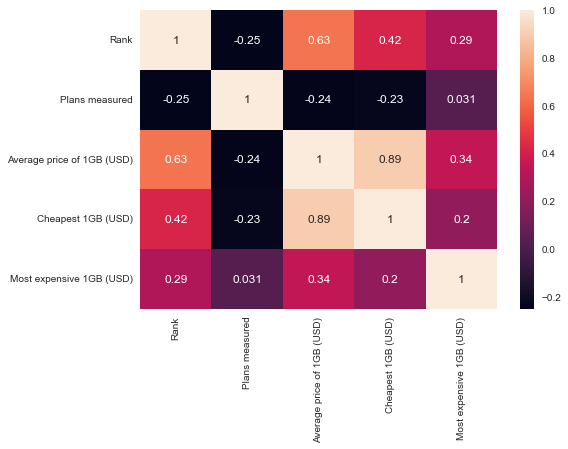

In [ ]:
sns.heatmap(corr,annot=True)

#### Checking Gaussian distribution of the feature

<AxesSubplot:xlabel='Plans measured', ylabel='Density'>

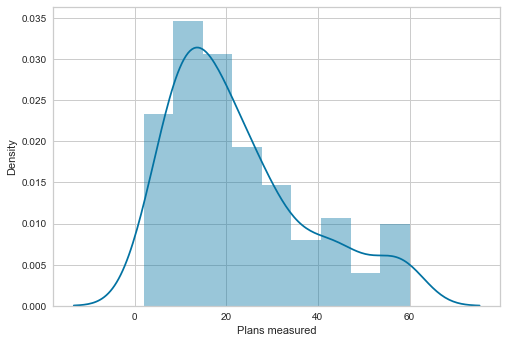

In [ ]:
sns.distplot(df1['Plans measured'])

#### Hypothesis Testing

In [ ]:
from scipy.stats import shapiro

In [ ]:
_,p_value= shapiro(df1['Plans measured'])
print(f'p_value={p_value}')

if p_value >=0.05:
    print('Null Hypothesis is True')
    print('Data is NORMALLY distributed')
else:
    print('Alternative Hypothesis is true')
    print('Data is NOT NORMALLY distributed')

p_value=9.166552933370653e-11
Alternative Hypothesis is true
Data is NOT NORMALLY distributed


<AxesSubplot:xlabel='Average price of 1GB (USD)', ylabel='Density'>

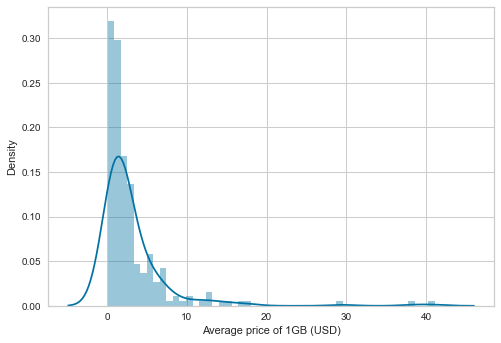

In [ ]:
sns.distplot(df1['Average price of 1GB (USD)'])

In [ ]:
_,p_value = shapiro(df1['Average price of 1GB (USD)'])
print(f'p_value= {p_value}')

if p_value >=0.05:
    print('Null Hypothesis is True')
    print('Data is NORMALLY distributed')
else:
    print('Alternative Hypothesis is true')
    print('Data is NOT NORMALLY distributed')

p_value= 7.7019689993774185e-25
Alternative Hypothesis is true
Data is NOT NORMALLY distributed


<AxesSubplot:xlabel='Cheapest 1GB (USD)', ylabel='Density'>

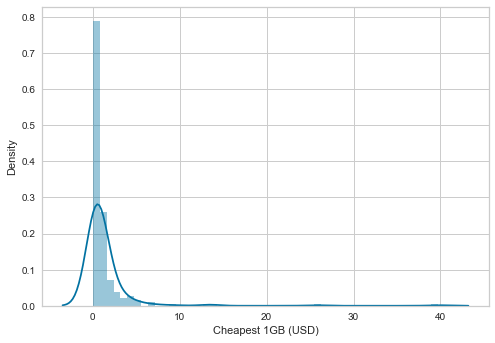

In [ ]:
sns.distplot(df1['Cheapest 1GB (USD)'])

In [ ]:
_,p_value = shapiro(df1['Cheapest 1GB (USD)'])

print(f'p_value={p_value}')
if p_value >=0.05:
    print('Null Hypothesis is True')
    print('Data is NORMALLY distributed')
else:
    print('Alternative Hypothesis is true')
    print('Data is NOT NORMALLY distributed')

p_value=1.2066467491552371e-28
Alternative Hypothesis is true
Data is NOT NORMALLY distributed


<AxesSubplot:xlabel='Most expensive 1GB (USD)', ylabel='Density'>

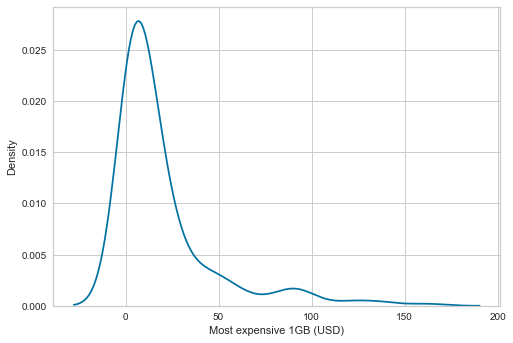

In [ ]:
sns.kdeplot(df1['Most expensive 1GB (USD)'])

In [ ]:
_,p_value = shapiro(df1['Most expensive 1GB (USD)'])
print(f'p_value = {p_value}')

if p_value >=0.05:
    print('Null Hypothesis is True')
    print('Data is NORMALLY distributed')
else:
    print('Alternative Hypothesis is true')
    print('Data is NOT NORMALLY distributed')

p_value = 2.962104692983982e-21
Alternative Hypothesis is true
Data is NOT NORMALLY distributed


#### All of the concerned columns are NOT NORMALLY Distributed

#### Scaling used = NORMALISATION (MinMaxScaler) as data is NOT Normally distributed

In [ ]:
df1['Most expensive 1GB (USD)'].nunique()

218

In [ ]:
df1['Cheapest 1GB (USD)'].nunique()

219

In [ ]:
df1['Average price of 1GB (USD)'].nunique()

229

In [ ]:
df1['Plans measured'].nunique()

54

In [ ]:
df1['Continental region'].nunique()

13

In [ ]:
df1.describe()

,Rank,Plans measured,Average price of 1GB (USD),Cheapest 1GB (USD),Most expensive 1GB (USD)
count,233.000000,233.000000,233.000000,233.000000,233.000000
mean,117.000000,22.712446,3.120159,1.333007,19.682519
std,67.405489,15.155193,4.891922,3.456762,27.748707
min,1.000000,2.000000,0.041993,0.012744,0.169131
25%,59.000000,11.000000,0.788750,0.222048,3.543466
50%,117.000000,19.000000,1.615865,0.500592,8.929376
75%,175.000000,31.000000,3.192736,1.110063,22.033267
max,233.000000,60.000000,41.061940,39.725040,162.202333


<AxesSubplot:xlabel='Average price of 1GB (USD)', ylabel='Plans measured'>

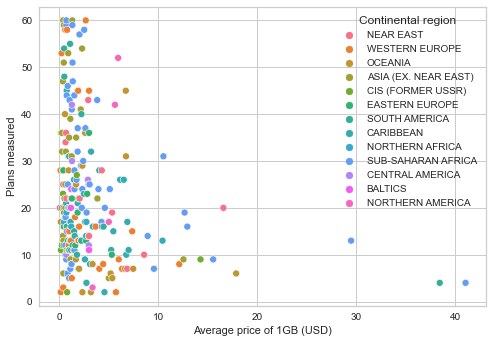

In [ ]:
sns.scatterplot(df1['Average price of 1GB (USD)'],df1['Plans measured'],hue=df1['Continental region'])

#### OUTLIERS Detetction

<AxesSubplot:xlabel='Plans measured'>

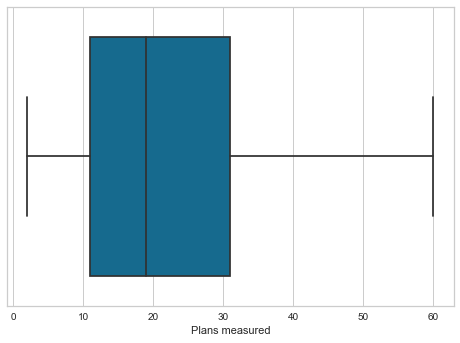

In [ ]:
sns.boxplot(df1['Plans measured'])

<AxesSubplot:xlabel='Most expensive 1GB (USD)'>

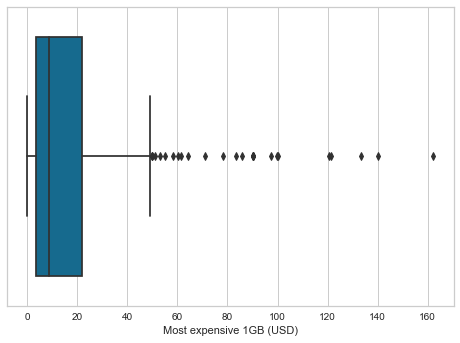

In [ ]:
sns.boxplot(df1['Most expensive 1GB (USD)'])

<AxesSubplot:xlabel='Cheapest 1GB (USD)'>

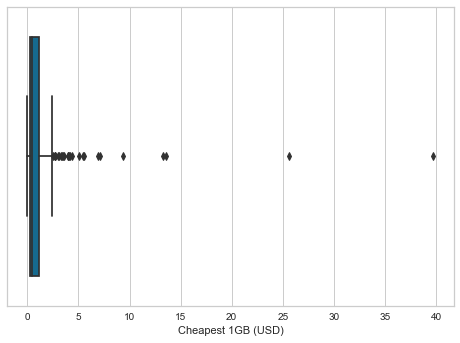

In [ ]:
sns.boxplot(df1['Cheapest 1GB (USD)'])

<AxesSubplot:xlabel='Average price of 1GB (USD)'>

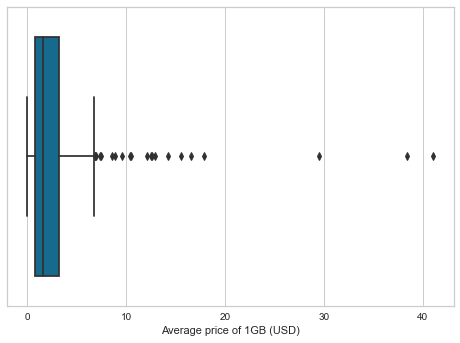

In [ ]:
sns.boxplot(df1['Average price of 1GB (USD)'])

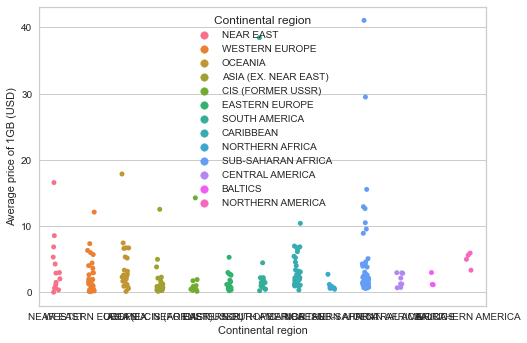

In [ ]:
sns.stripplot(y="Average price of 1GB (USD)", x="Continental region", hue='Continental region', data=df1, palette="husl");

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        233 non-null    int64  
 1   Name                        233 non-null    object 
 2   Continental region          233 non-null    object 
 3   Plans measured              233 non-null    int64  
 4   Average price of 1GB (USD)  233 non-null    float64
 5   Cheapest 1GB (USD)          233 non-null    float64
 6   Most expensive 1GB (USD)    233 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 12.9+ KB


In [ ]:
new_df= df1[['Average price of 1GB (USD)']]
new_df

,Average price of 1GB (USD)
0,0.041993
1,0.119992
2,0.139665
3,0.149301
4,0.165797
...,...
228,16.583433
229,17.876890
230,29.491333
231,38.451563


### Scaling - Normalization - MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mnmx_scaler = MinMaxScaler()

x_scale = mnmx_scaler.fit_transform(new_df)
n1 = pd.DataFrame(x_scale, columns= new_df.columns)
n1

,Average price of 1GB (USD)
0,0.000000
1,0.001901
2,0.002381
3,0.002616
4,0.003018
...,...
228,0.403254
229,0.434786
230,0.717927
231,0.936363


In [ ]:
df2 = df1[['Name','Continental region','Average price of 1GB (USD)']]
df2

,Name,Continental region,Average price of 1GB (USD)
0,Israel,NEAR EAST,0.041993
1,Italy,WESTERN EUROPE,0.119992
2,San Marino,WESTERN EUROPE,0.139665
3,Fiji,OCEANIA,0.149301
4,India,ASIA (EX. NEAR EAST),0.165797
...,...,...,...
228,Yemen,NEAR EAST,16.583433
229,Tokelau,OCEANIA,17.876890
230,São Tomé and Príncipe,SUB-SAHARAN AFRICA,29.491333
231,Falkland Islands,SOUTH AMERICA,38.451563


### Model Training

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3)
pred=kmeans_model.fit(n1)

In [ ]:
kmeans_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1])

In [ ]:
kmeans_model.fit_predict(new_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2])

In [ ]:
kmeans_model.cluster_centers_

array([[ 8.27090759],
       [ 1.58175905],
       [36.33494541]])

### WCSS

In [ ]:
kmeans_model.inertia_

779.753001040981

In [ ]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(n1)
kmeans_model.inertia_

0.4634115542555293

In [ ]:
kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(n1)
kmeans_model.inertia_


0.20785772552825288

In [ ]:
kmeans_model.inertia_

0.20785772552825288

In [ ]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(n1)
kmeans_model.inertia_

0.4634115542555293

In [ ]:
wcss_list = []
for k in range(1,4):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(n1)
    wcss = kmeans_model.inertia_
    wcss_list.append(wcss)
    print(f'k=={k}, WCSS=={wcss}')

k==1, WCSS==3.299565890943554
k==2, WCSS==1.2689266912147983
k==3, WCSS==0.4634115542555293


Text(0, 0.5, 'WCSS')

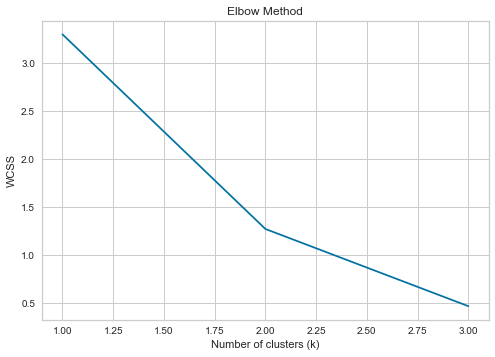

In [ ]:
k_val = range(1,4)
plt.plot(k_val, wcss_list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')

In [ ]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(n1)

KMeans(n_clusters=3)

In [ ]:
kmeans_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1])

In [ ]:
n1['Cluster'] = kmeans_model.labels_
print(n1)

     Average price of 1GB (USD)  Cluster
0                      0.000000        0
1                      0.001901        0
2                      0.002381        0
3                      0.002616        0
4                      0.003018        0
..                          ...      ...
228                    0.403254        2
229                    0.434786        2
230                    0.717927        1
231                    0.936363        1
232                    1.000000        1

[233 rows x 2 columns]


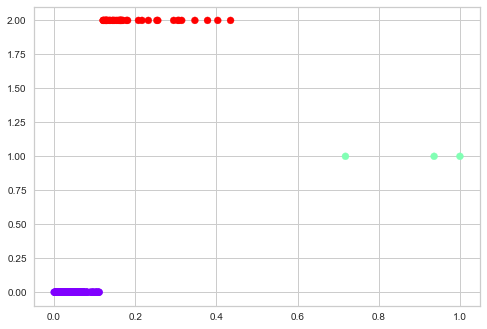

In [ ]:
plt.scatter(n1['Average price of 1GB (USD)'],n1['Cluster'], c = kmeans_model.labels_, cmap = 'rainbow')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
cluster_score = []
cluster_range = range(2,5)
for k in cluster_range:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(n1)
    cluster_score.append(silhouette_score(n1, kmeans_model.labels_))

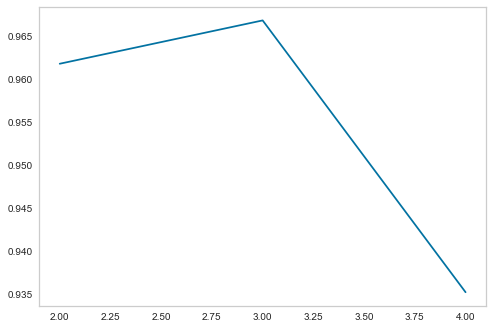

In [ ]:
plt.plot(cluster_range,cluster_score)
plt.grid()

In [ ]:
score = silhouette_score(n1, kmeans_model.labels_)
score

0.9352768009510124

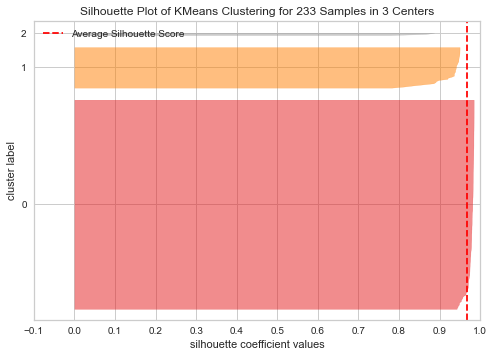

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 233 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
kmeans_model = SilhouetteVisualizer(KMeans(3))
kmeans_model.fit(n1)
kmeans_model.show()

In [ ]:
n1['cluster_ids'] = kmeans_model.labels_
n1

,Average price of 1GB (USD),Cluster,cluster_ids
0,0.000000,0,0
1,0.001901,0,0
2,0.002381,0,0
3,0.002616,0,0
4,0.003018,0,0
...,...,...,...
228,0.403254,2,1
229,0.434786,2,1
230,0.717927,1,2
231,0.936363,1,2


### Code for assigning Clusters

In [ ]:
n1

,Average price of 1GB (USD),Cluster,cluster_ids
0,0.000000,0,0
1,0.001901,0,0
2,0.002381,0,0
3,0.002616,0,0
4,0.003018,0,0
...,...,...,...
228,0.403254,2,1
229,0.434786,2,1
230,0.717927,1,2
231,0.936363,1,2


In [ ]:
df1

,Rank,Name,Continental region,Plans measured,Average price of 1GB (USD),Cheapest 1GB (USD),Most expensive 1GB (USD)
0,1,Israel,NEAR EAST,20,0.041993,0.017171,0.169131
1,2,Italy,WESTERN EUROPE,28,0.119992,0.046689,2.002370
2,3,San Marino,WESTERN EUROPE,2,0.139665,0.079094,0.200237
3,4,Fiji,OCEANIA,17,0.149301,0.074650,0.783829
4,5,India,ASIA (EX. NEAR EAST),36,0.165797,0.047415,8.101439
...,...,...,...,...,...,...,...
228,229,Yemen,NEAR EAST,20,16.583433,3.996008,43.956088
229,230,Tokelau,OCEANIA,6,17.876890,13.570778,24.427400
230,231,São Tomé and Príncipe,SUB-SAHARAN AFRICA,13,29.491333,13.271100,162.202333
231,232,Falkland Islands,SOUTH AMERICA,4,38.451563,25.634375,70.987500


In [ ]:
new_df

,Average price of 1GB (USD)
0,0.041993
1,0.119992
2,0.139665
3,0.149301
4,0.165797
...,...
228,16.583433
229,17.876890
230,29.491333
231,38.451563


In [ ]:
n1['tmp'] =1
df1['tmp']=1

In [ ]:
print(df2.columns.intersection(n1.columns))

Index(['Average price of 1GB (USD)'], dtype='object')


In [ ]:
print(df2.join(n1,lsuffix='_left',rsuffix='_right'))

                      Name    Continental region  \
0                   Israel             NEAR EAST   
1                    Italy        WESTERN EUROPE   
2               San Marino        WESTERN EUROPE   
3                     Fiji               OCEANIA   
4                    India  ASIA (EX. NEAR EAST)   
..                     ...                   ...   
228                  Yemen             NEAR EAST   
229                Tokelau               OCEANIA   
230  São Tomé and Príncipe    SUB-SAHARAN AFRICA   
231       Falkland Islands         SOUTH AMERICA   
232           Saint Helena    SUB-SAHARAN AFRICA   

     Average price of 1GB (USD)_left  Average price of 1GB (USD)_right  \
0                           0.041993                          0.000000   
1                           0.119992                          0.001901   
2                           0.139665                          0.002381   
3                           0.149301                          0.002616   
4    

In [ ]:
Avg = df2.join(n1,lsuffix='_left',rsuffix='_right')
Avg

,Name,Continental region,Average price of 1GB (USD)_left,Average price of 1GB (USD)_right,Cluster,cluster_ids,tmp
0,Israel,NEAR EAST,0.041993,0.000000,0,0,1
1,Italy,WESTERN EUROPE,0.119992,0.001901,0,0,1
2,San Marino,WESTERN EUROPE,0.139665,0.002381,0,0,1
3,Fiji,OCEANIA,0.149301,0.002616,0,0,1
4,India,ASIA (EX. NEAR EAST),0.165797,0.003018,0,0,1
...,...,...,...,...,...,...,...
228,Yemen,NEAR EAST,16.583433,0.403254,2,1,1
229,Tokelau,OCEANIA,17.876890,0.434786,2,1,1
230,São Tomé and Príncipe,SUB-SAHARAN AFRICA,29.491333,0.717927,1,2,1
231,Falkland Islands,SOUTH AMERICA,38.451563,0.936363,1,2,1


In [ ]:
Avg.drop(['Cluster','tmp'],axis=1,inplace=True)

In [ ]:
Avg

,Name,Continental region,Average price of 1GB (USD)_left,Average price of 1GB (USD)_right,cluster_ids
0,Israel,NEAR EAST,0.041993,0.000000,0
1,Italy,WESTERN EUROPE,0.119992,0.001901,0
2,San Marino,WESTERN EUROPE,0.139665,0.002381,0
3,Fiji,OCEANIA,0.149301,0.002616,0
4,India,ASIA (EX. NEAR EAST),0.165797,0.003018,0
...,...,...,...,...,...
228,Yemen,NEAR EAST,16.583433,0.403254,1
229,Tokelau,OCEANIA,17.876890,0.434786,1
230,São Tomé and Príncipe,SUB-SAHARAN AFRICA,29.491333,0.717927,2
231,Falkland Islands,SOUTH AMERICA,38.451563,0.936363,2


In [ ]:
Avg['cluster_ids'].value_counts()

0    192
1     38
2      3
Name: cluster_ids, dtype: int64

In [ ]:
Avg.groupby('cluster_ids').get_group(0).sort_values('Average price of 1GB (USD)_left')

,Name,Continental region,Average price of 1GB (USD)_left,Average price of 1GB (USD)_right,cluster_ids
0,Israel,NEAR EAST,0.041993,0.000000,0
1,Italy,WESTERN EUROPE,0.119992,0.001901,0
2,San Marino,WESTERN EUROPE,0.139665,0.002381,0
3,Fiji,OCEANIA,0.149301,0.002616,0
4,India,ASIA (EX. NEAR EAST),0.165797,0.003018,0
...,...,...,...,...,...
187,Cape Verde,SUB-SAHARAN AFRICA,4.302400,0.103862,0
188,Norway,WESTERN EUROPE,4.437586,0.107157,0
189,Guyana,SOUTH AMERICA,4.471301,0.107979,0
190,Virgin Islands (U.S.),CARIBBEAN,4.562500,0.110203,0


In [ ]:
Avg.groupby('cluster_ids').get_group(1).sort_values('Average price of 1GB (USD)_left')

,Name,Continental region,Average price of 1GB (USD)_left,Average price of 1GB (USD)_right,cluster_ids
192,Bermuda,NORTHERN AMERICA,5.000000,0.120868,1
193,British Indian Ocean Territory,ASIA (EX. NEAR EAST),5.000000,0.120868,1
194,Chad,SUB-SAHARAN AFRICA,5.102163,0.123359,1
195,New Caledonia,OCEANIA,5.184940,0.125377,1
196,Aruba,CARIBBEAN,5.245421,0.126851,1
197,Greece,EASTERN EUROPE,5.304403,0.128289,1
198,Cyprus,NEAR EAST,5.336316,0.129067,1
199,Nauru,OCEANIA,5.357972,0.129595,1
200,Bahamas,CARIBBEAN,5.460281,0.132089,1
201,United States,NORTHERN AMERICA,5.621875,0.136029,1


In [ ]:
Avg.groupby('cluster_ids').get_group(2).sort_values('Average price of 1GB (USD)_left')

,Name,Continental region,Average price of 1GB (USD)_left,Average price of 1GB (USD)_right,cluster_ids
230,São Tomé and Príncipe,SUB-SAHARAN AFRICA,29.491333,0.717927,2
231,Falkland Islands,SOUTH AMERICA,38.451563,0.936363,2
232,Saint Helena,SUB-SAHARAN AFRICA,41.061940,1.000000,2


In [ ]:
import plotly.express as px
a = Avg
fig = px.scatter(a,x='Continental region',y='Name',color='cluster_ids',size='cluster_ids' , hover_data=['Average price of 1GB (USD)_left'])
fig.show()

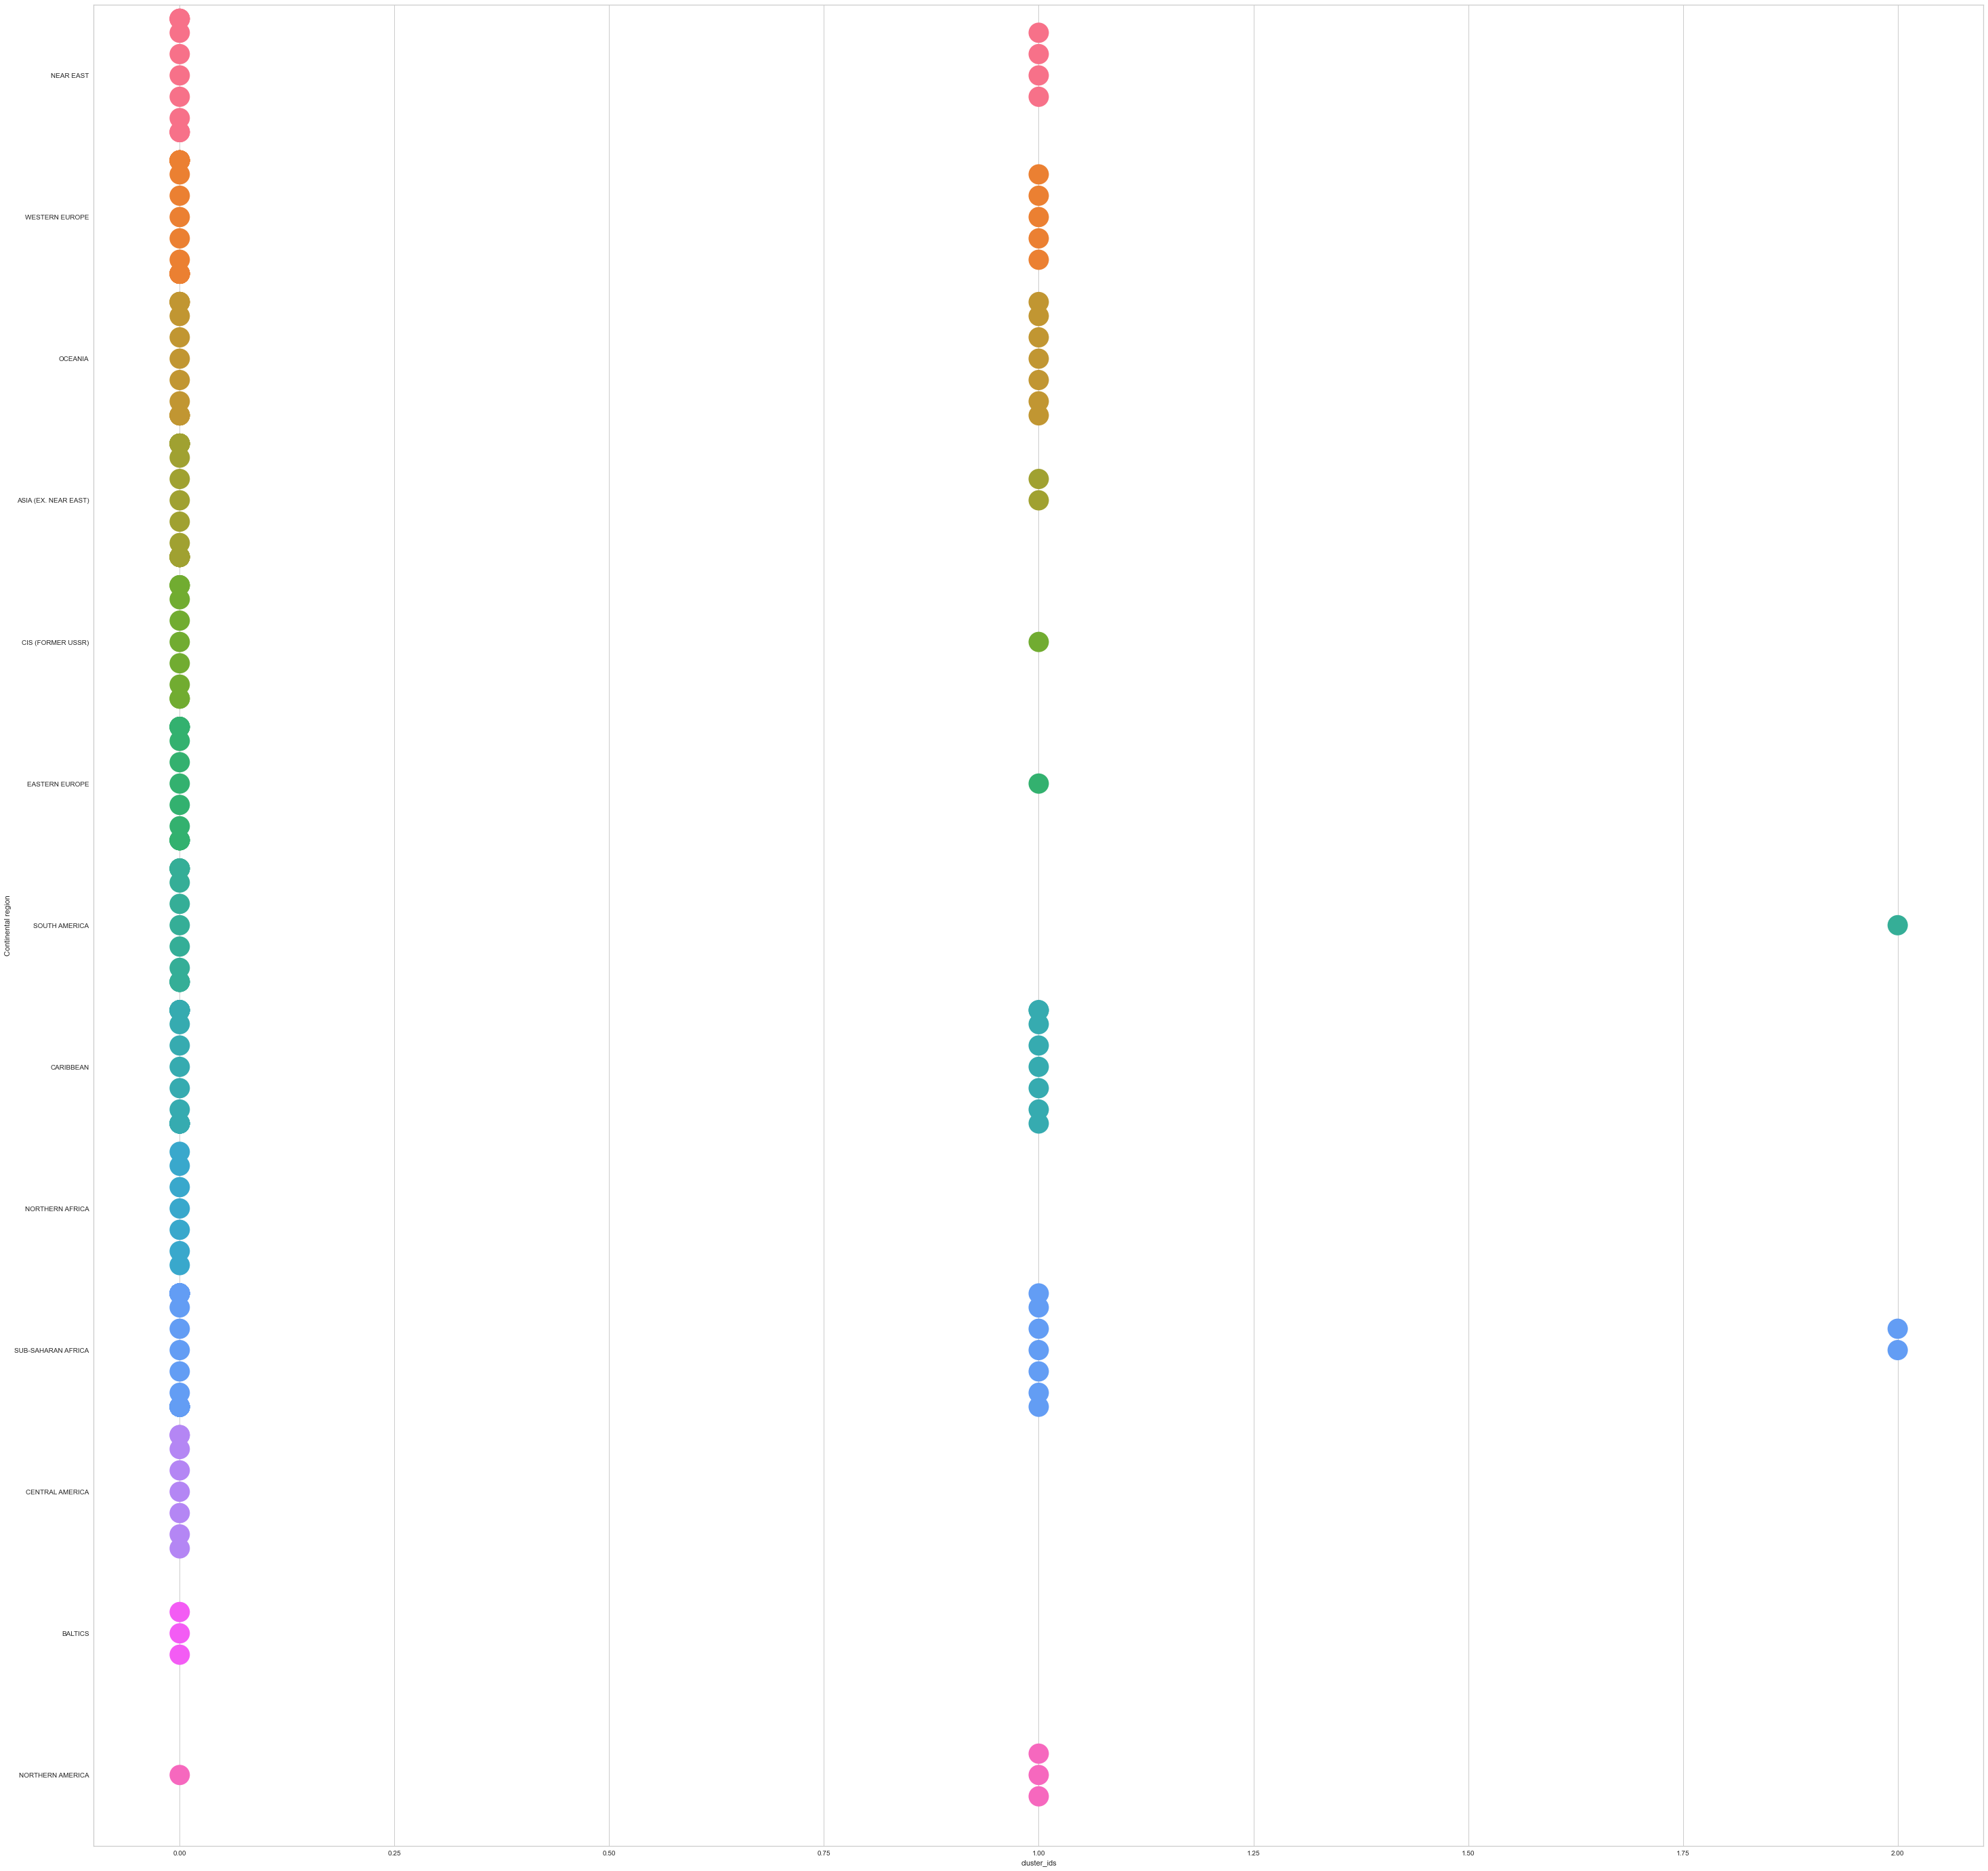

In [ ]:
fig, ax = plt.subplots(figsize=(50,50))

sns.swarmplot(y="Continental region", x="cluster_ids", data=Avg, palette="husl",size=30,ax=ax);

fig.savefig('Avg_swarmplot.jpg', bbox_inches='tight', dpi=150)

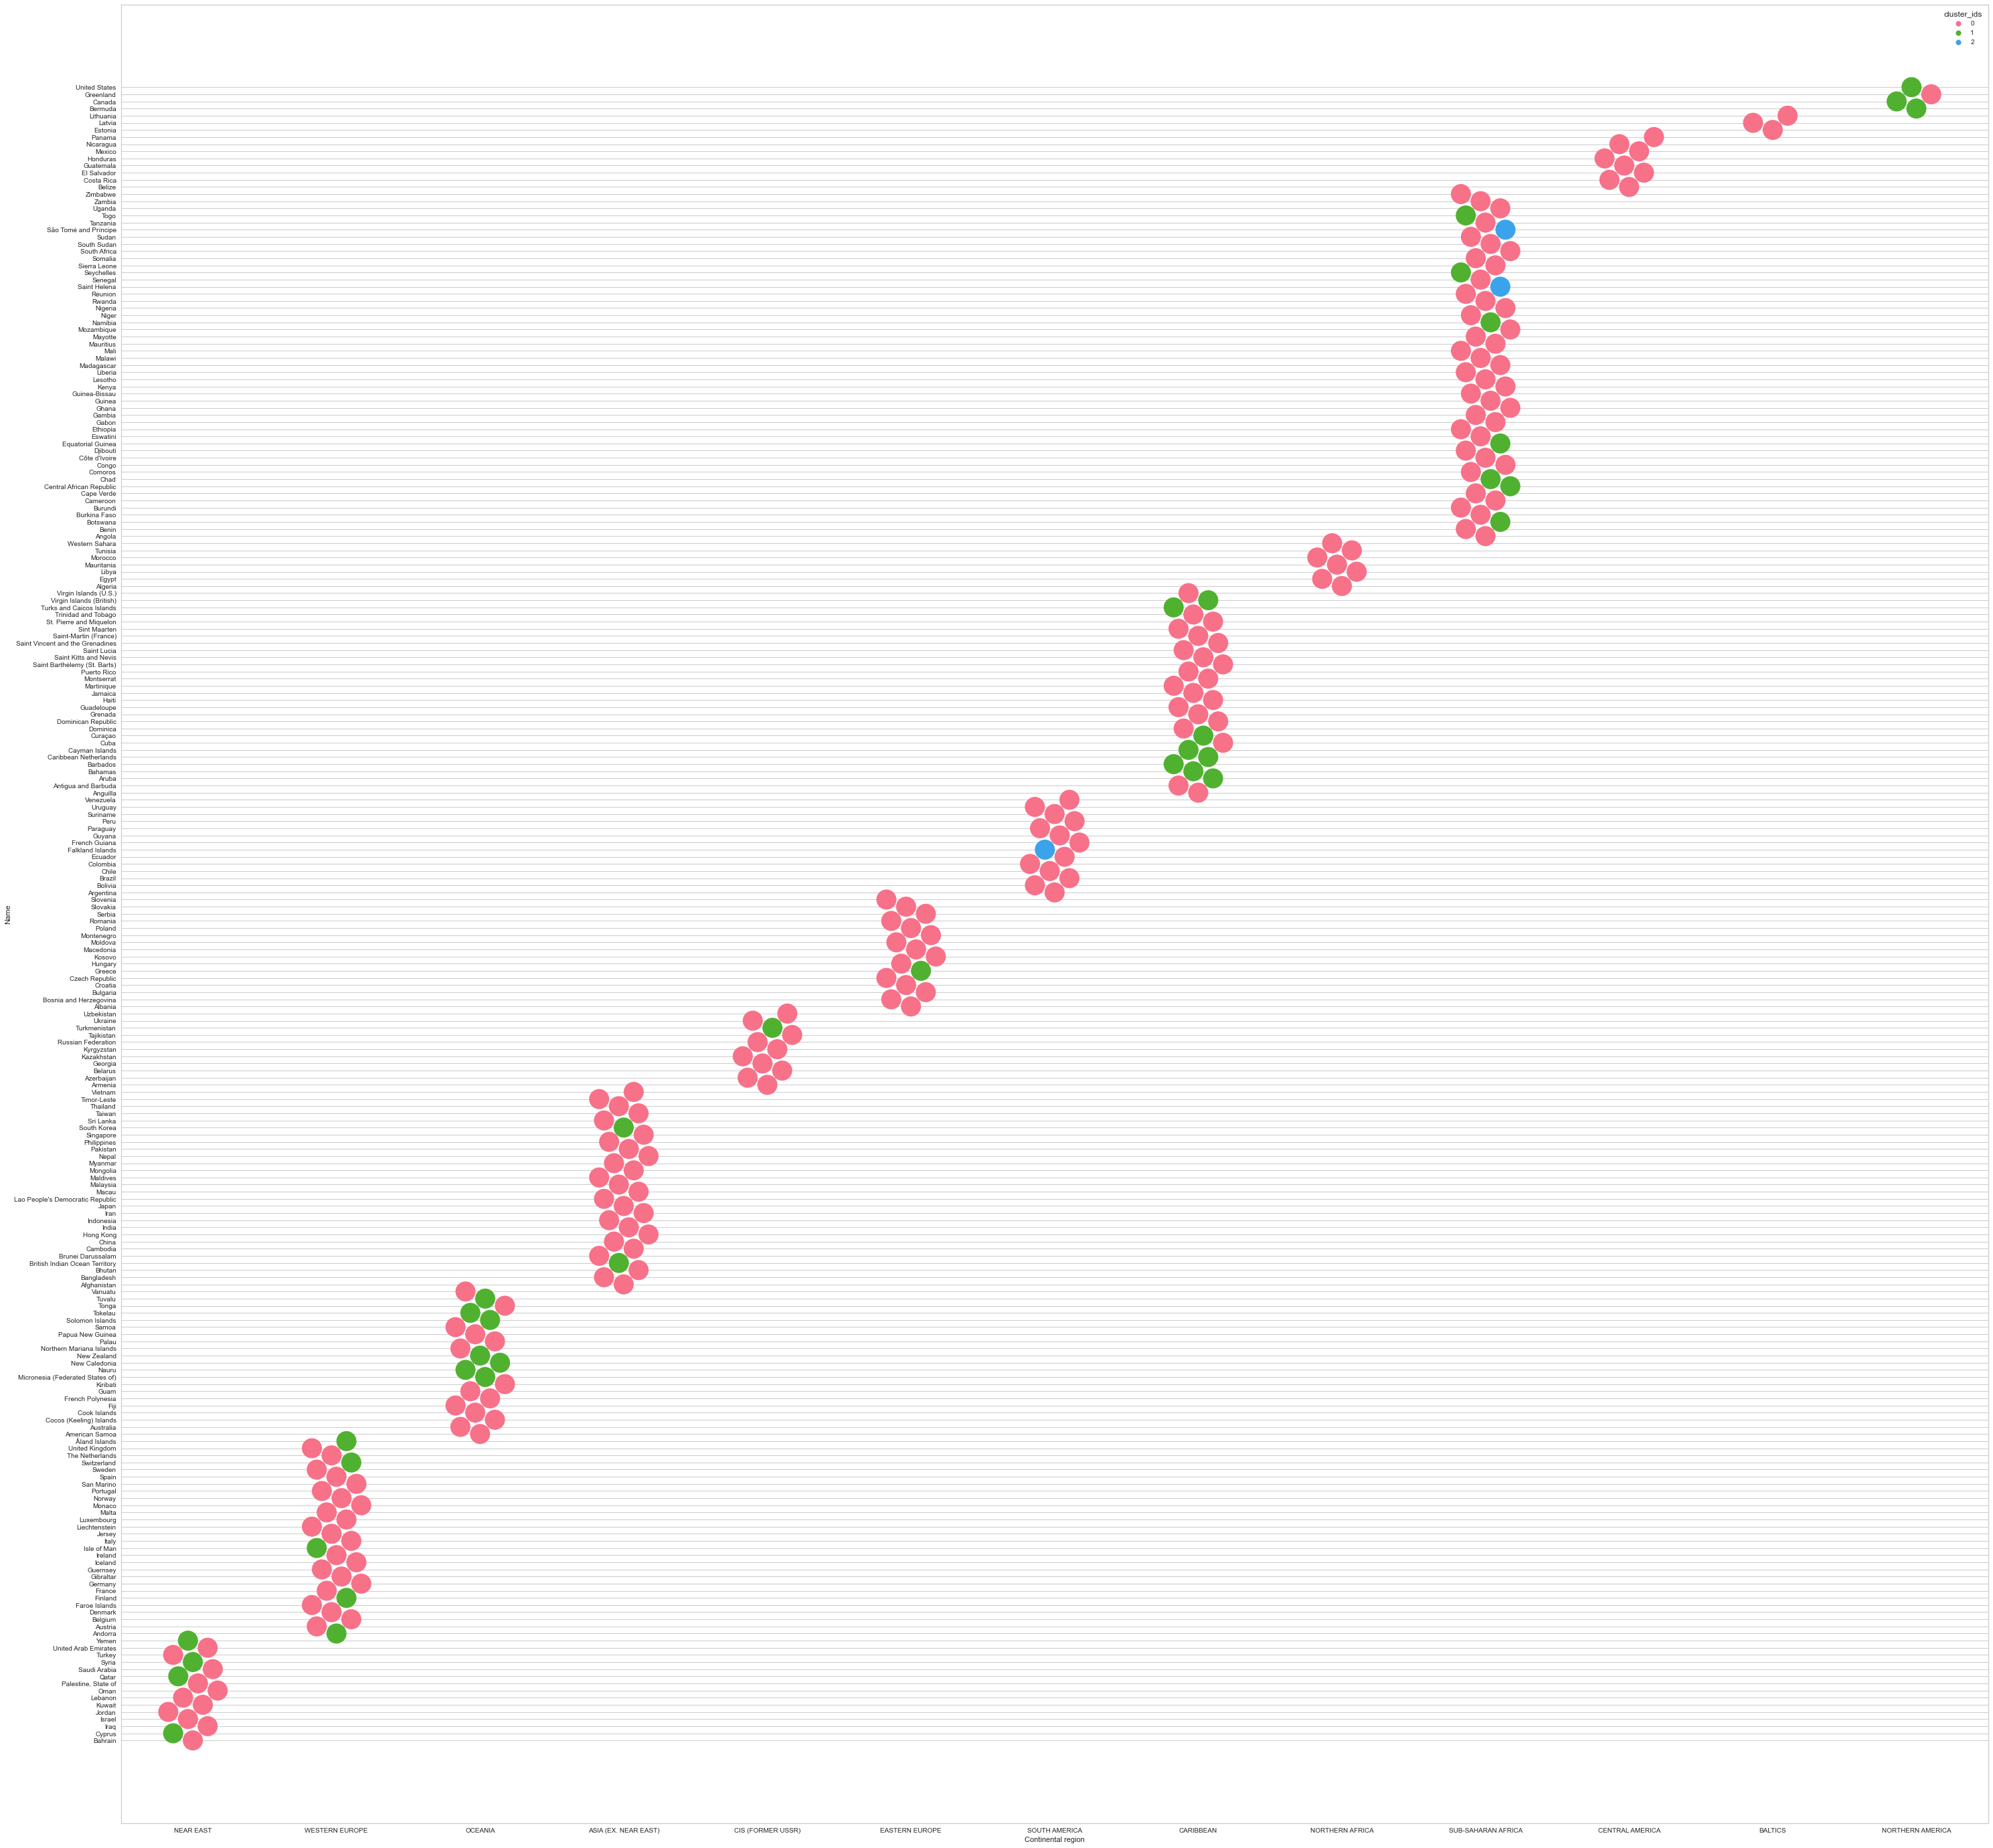

In [ ]:
fig, ax = plt.subplots(figsize=(50,50))

sns.swarmplot(y="Name", x="Continental region", hue='cluster_ids', data=Avg, palette="husl",size=30,ax=ax);

fig.savefig('Avg_swarmplot.jpg', bbox_inches='tight', dpi=150)

### Insights

KMeans Clustering Algorithm Approach is used in this case

1) For Average Data Price (USD) - 3 Clusters were observed 


2) 3 clusters stands for 
                      
                       0 (Low Avg)    -> $0.04 to $4.60   (count = 192)
                       
                       1 (Medium Avg) -> $5 to $17.88     (count = 38)
                       
                       2 (High Avg)   -> $29.49 to $41.06 (count = 3)


2) 0 - Represents major share, 
Per GB Data Price of -> USD range->  $0.04 to $4.60 (count = 192)
Below Average Price of $4.29
i.e in every continent region Low Avg category exists

3) 1 - Represents second highest contribution-
Per GB Data Price of -> USD range->  $5 to $17.88  (count = 38)
Northern America region countries have the majority of the share

4) 2 - Represents less contribution-
Per GB Data Price of -> USD range above-> $29.49 to $41.06 (count = 3)
South America Continent -> Country- Falkland Island
Sub-Saharan Africa-> Country- Saint Helena
Sub-Saharan Africa-> Country- S?o Tom‚ and Pr¡ncipe


### Approach (Business opportunities)

Approach-
Product-

If particular telecom company wants to penetrate the market then this dataset will be helpful.

Price-
Less price war is there in Continents- Northern America,South America,Sub-Saharan Africa

Place-
For new telecom player in order to enter into market Sub-Saharan Africa is good as all of the 
clusters are available there.

Promotion-
For boosting customer acquisition or retention potential cluster is -> 1 (Medium Avg) 
1 (Medium Avg) -> $5 to $17.88 -> 
Potential areas for promotional activities/SALES are identified in following 

Continental Region-

ASIA (EX.NEAR EAST)

CIS (FORMER USSR)

EASTERN EUROPE

SOUTH AMERICA

NORTHERN AFRICA

CENTRAL AMERICA

BALTICS